<a href="https://colab.research.google.com/github/Kushan1001/Hotel-booking-data-analysis/blob/main/Hotel_Booking_Analysis(Compiled).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up

In [41]:
# Importing the libs

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6

# set some display options:

pd.set_option("display.max_columns", 36)
plt.style.use('ggplot')


In [42]:
# Loading the data
hotel_df = pd.read_csv('Hotel Bookings.csv')

# Getting a glance of the pandas dataframe

In [43]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [44]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [45]:
hotel_df.size

3820480

In [46]:
hotel_df.shape

(119390, 32)

In [47]:
# a glance of the dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Data Cleaning**

In [48]:
# checking percentage of null values in the dataframe
hotel_df.isnull().sum()/len(hotel_df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

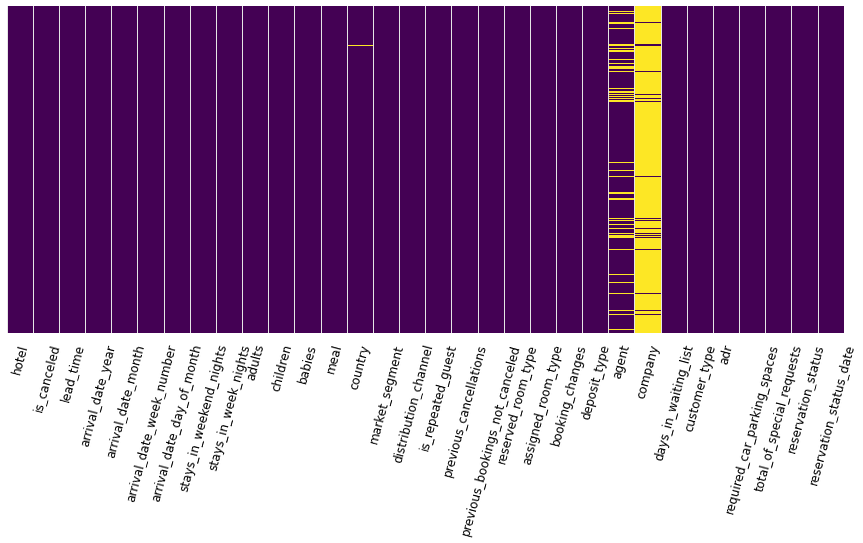

In [49]:
plt.figure(figsize=(15,6))
sns.heatmap(hotel_df.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(color = 'black', rotation = 75, size = 12);

In [50]:
# Dropping agent and company's columns as there are high percentage of null values
hotel_df.drop(columns=['company','agent'],inplace = True)

In [51]:
# getting sum of null values of the country's column
hotel_df['country'].isnull().sum()

488

In [52]:
# getting mode of the coutry's column
hotel_df['country'].mode()

0    PRT
dtype: object

In [53]:
# filling NA values of the country's column with mode of the data
hotel_df['country'] = hotel_df['country'].fillna('PRT')

In [54]:
#getting statistics of the data 
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Checking for outliers

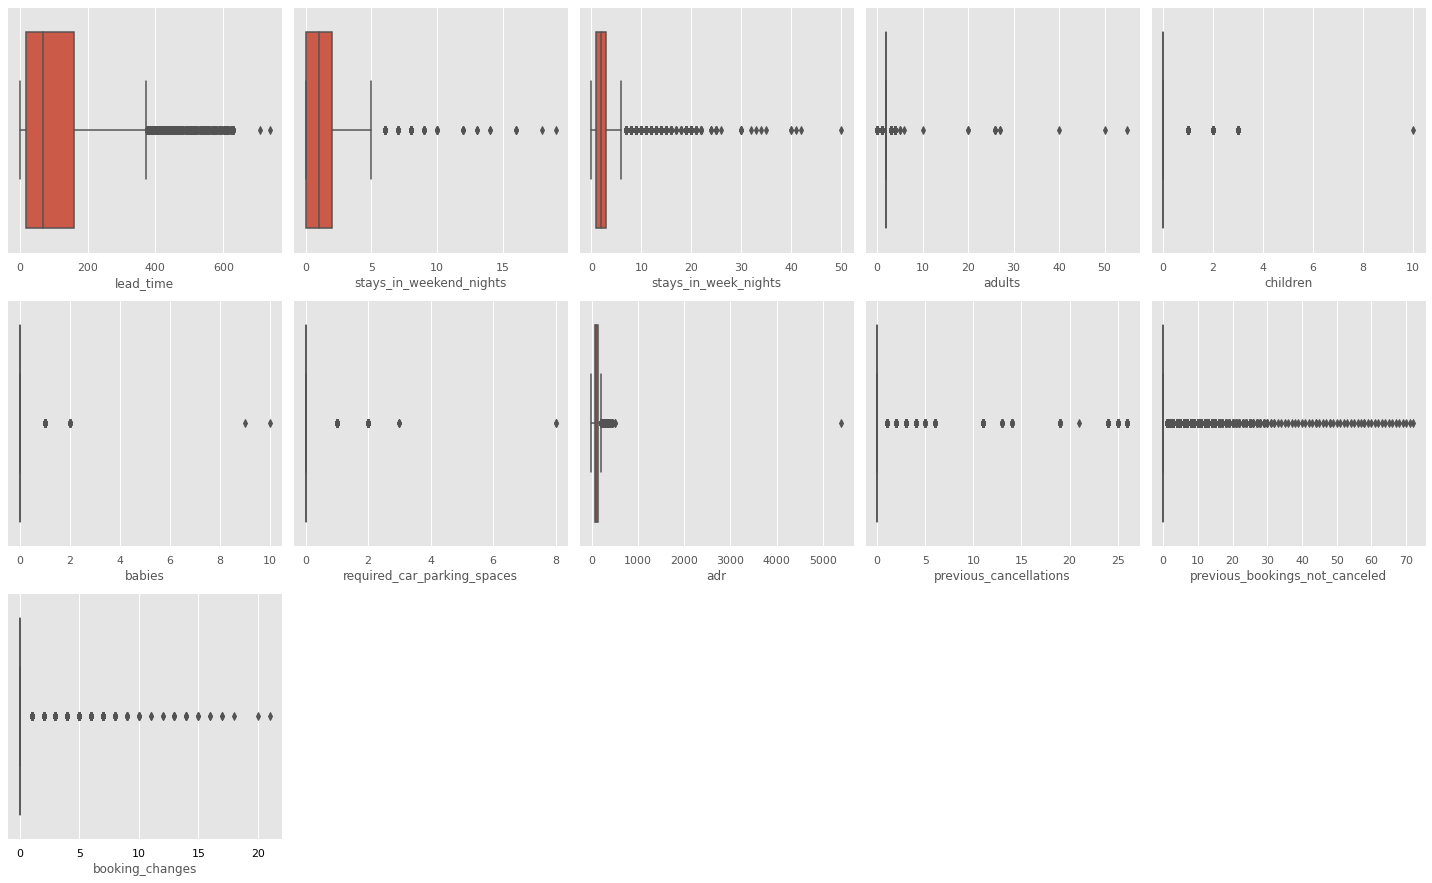

In [55]:
# checking for ouliers
list_of_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize = (20,20))

for elem in list_of_columns:
  plt.subplot(5,5,n)
  n = n+1
  sns.boxplot(hotel_df[elem])
  plt.tight_layout()
  
plt.xticks(color = 'black');

In [56]:
#removing outliers based on conditional filtering
hotel_df = hotel_df.loc[hotel_df['lead_time'] < hotel_df['lead_time'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_weekend_nights'] < hotel_df['stays_in_weekend_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_week_nights'] < hotel_df['stays_in_week_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['adults'] < 4]
hotel_df = hotel_df.loc[hotel_df['children'] < 5]
hotel_df = hotel_df.loc[hotel_df['babies'] < 4]
hotel_df = hotel_df.loc[hotel_df['required_car_parking_spaces'] < 5]
hotel_df = hotel_df.loc[hotel_df['adr'] < 1000]


## **Now our data looks clean. Let's start with  data visualisation.**

## **Which group of adults(with children/without children) have the most speical requests**





In [57]:
#creating a new column of adults with children to check weather adults prefer to travel solo or with children/babies 

def do_adults_travel_with_family(col_1,col_2):
  ''' takes argument as children and babies 
      and compares it with adults and returns
      1 for if they any children/babies and 0 
      for if they don't have any'''
  if col_1 or col_2 != 0:
    return ('with children')
  else:
    return ('without children')

hotel_df['adults_with_children'] = hotel_df.apply(lambda x: do_adults_travel_with_family(x['children'],x['babies']),axis = 1)

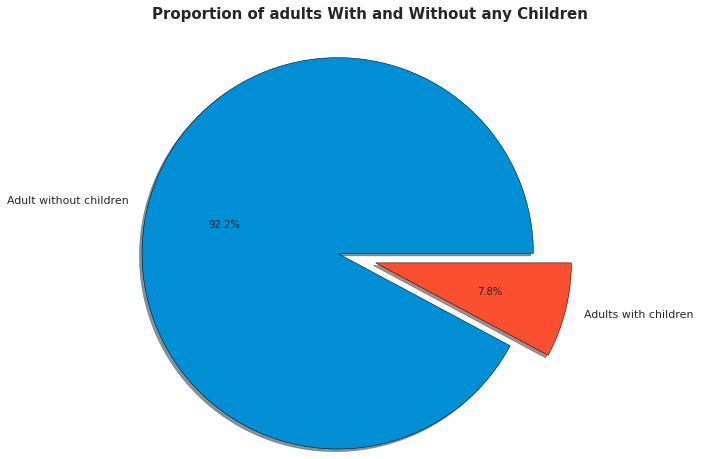

<Figure size 1440x1440 with 0 Axes>

In [58]:
# visualising proportion of adults with and without any children

explode = [0.0,0.3]
labels = ['Adult without children','Adults with children']
colors = ['#008fd5','#fc4f30']

plt.pie(hotel_df['adults_with_children'].value_counts(), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = explode, labels = labels, colors = colors,radius = 1.5, shadow = 'True')

plt.title('Proportion of adults With and Without any Children', fontweight = 'bold', fontsize = 15 ,x = 0.6, y = 1.2)

plt.figure(figsize = (20,20))

plt.tight_layout();

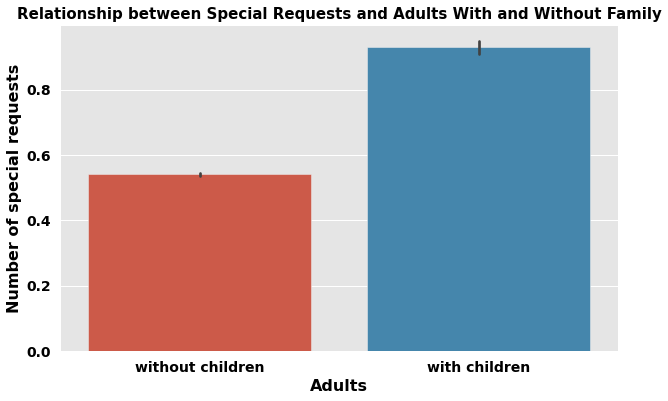

In [59]:
#checking which group of adults has the more speical requests
plt.figure(figsize=(10,6))
bar_chart = (sns.barplot(data = hotel_df, x = 'adults_with_children', y = 'total_of_special_requests')
            .set_title('Relationship between Special Requests and Adults With and Without Family', fontweight = 'bold', color = 'black' ,size = 15, x= 0.5, y= 1))

plt.xlabel('Adults', fontweight = 'bold', color = 'black', size = 16)
plt.ylabel('Number of special requests', fontweight = 'bold', color = 'black', size = 16)
plt.xticks(color = 'black', fontweight = 'bold', size = 14)
plt.yticks(color = 'black',fontweight = 'bold',size = 14);



It is evident from the piechart that almost 90% of adults prefer to travel without any children and only 10% of adults prefer to travel with family. Moreover, adults who travel without any children have the most special requests.

## **Cancellations over the different months**

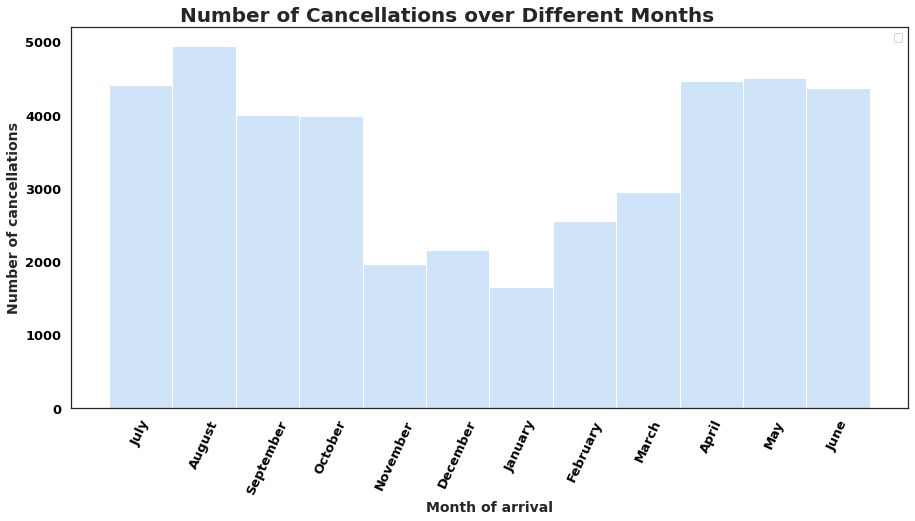

In [60]:
#number of cancellations for different months

no_of_cancellations = hotel_df.loc[hotel_df['is_canceled'] == 1, :]

sns.set(style = 'white')

plt.figure(figsize = (15,7))
histogram_plot = sns.histplot(data = no_of_cancellations , x = 'arrival_date_month', hue = 'is_canceled' , palette = 'pastel')

plt.title('Number of Cancellations over Different Months', fontweight = 'bold',size = 20,x = 0.45)
plt.xlabel('Month of arrival',size = 14, fontweight = 'bold')
plt.ylabel('Number of cancellations',size = 14 , fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 65)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')

plt.legend([]);

### **Insights**

1.   Over the year, summer months(April-August) experienced the highest number of cancellations 
2.   However, the winter months(November-January) had the least cancellations







# **Are cancellation rates related with the lead time?**

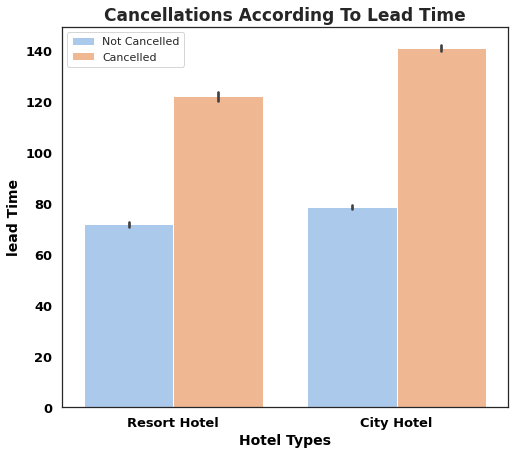

In [61]:
# connection between lead time and number of cancellations

plt.figure(figsize = (8,7))

cancelations_according_to_lead_time = hotel_df.loc[ : , ['hotel','is_canceled','lead_time']]

sns.barplot(data = cancelations_according_to_lead_time, x = 'hotel', y = 'lead_time', hue = 'is_canceled', palette= 'pastel')
plt.title('Cancellations According To Lead Time', size = 17,fontweight = 'bold')
plt.xlabel('Hotel Types', size = 14, fontweight = 'bold', color = 'black')
plt.ylabel('lead Time', size = 14, fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
l = plt.legend()
l.get_texts()[0].set_text('Not Cancelled')
l.get_texts()[1].set_text('Cancelled');


### **Insights**

1.   It can be seen from the graph that irrespective of the hotel type customer generally cancel their bookings with high lead time.
2.  Moreover, it also become evident that if the lead time crosses 80-82 days then, the customer is bound to cancel their booking.



#  **Relationship between deposit type and cancellations**

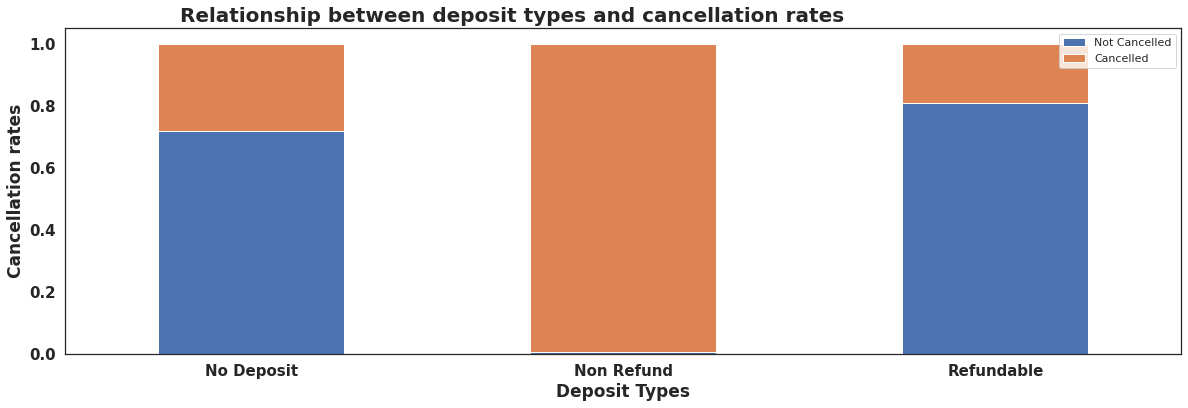

In [62]:
deposit_cancelltion_barplot = hotel_df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True).unstack('is_canceled').plot.bar(stacked=True,figsize = (20,6))

plt.xlabel('Deposit Types', size = 17, fontweight = 'bold')
plt.ylabel('Cancellation rates', size = 17, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 360)
plt.yticks(fontsize = 15, fontweight = 'bold')
l = plt.legend()
l.get_texts()[0].set_text('Not Cancelled')
l.get_texts()[1].set_text('Cancelled')

plt.title('Relationship between deposit types and cancellation rates', size = 20, fontweight = 'bold',x = 0.4);


**Insights**

1.   First of all, customers who have paid non-refundable deposit, most of them are bound their booking.
2.   Secondly, customers have paid either no deposit or refundable deposit are likely to not cancel their booking as comapared to customers who have paid non-refundable deposit.




# **ADR over the months**

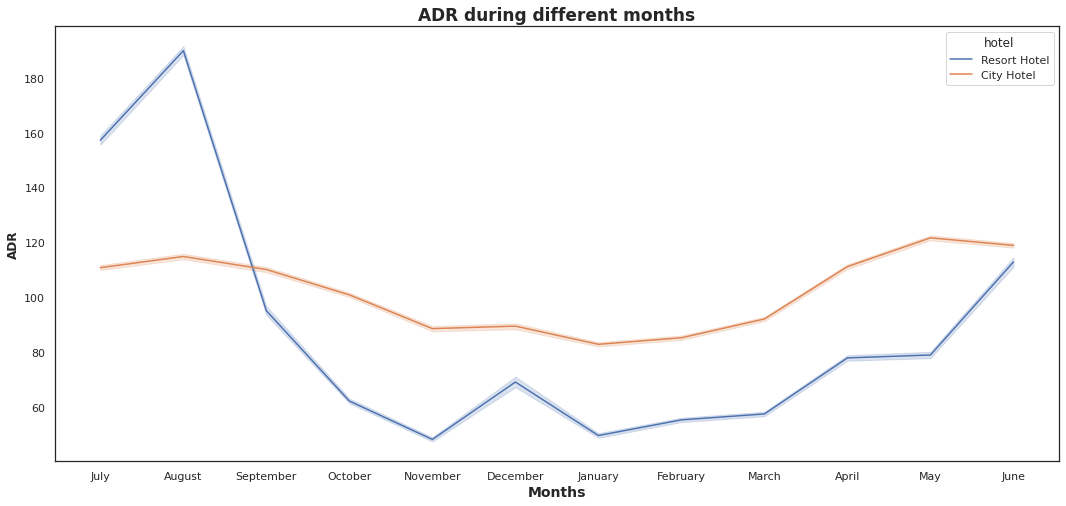

In [63]:
plt.figure(figsize = (18,8))

sns.lineplot(data = hotel_df, x = 'arrival_date_month', y = 'adr', hue = 'hotel').set_title('ADR during different months', size = 17,fontweight = 'bold')
plt.xlabel('Months', size = 14, fontweight = 'bold')
plt.ylabel('ADR', fontweight = 'bold');


### **Insights**

1.   ADR was the resort hotel was at its peak during the summer months(May-August) and bottom in months of October-Janaury
2.   On the other hand, for the city hotel ADR was relatively same in all the months and followed the same pattern as the resort hotel.



# **Most revenue generating hotel rooms and which customer group books them**

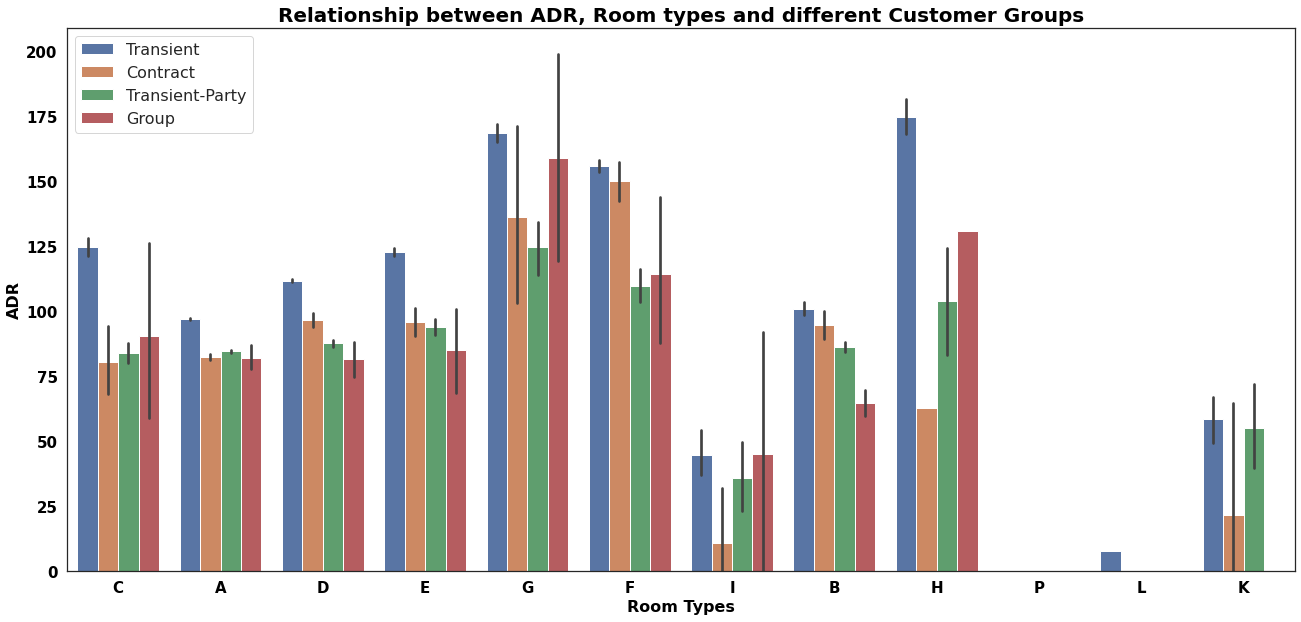

In [64]:
plt.figure(figsize = (22,10))

sns.barplot(data = hotel_df, y = 'adr', x = 'assigned_room_type', hue = 'customer_type')

plt.xlabel('Room Types', fontweight = 'bold', size = 16, color = 'black')
plt.ylabel('ADR',fontweight = 'bold', size = 16, color = 'black')
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'black')
plt.legend(fontsize = 16)

plt.title('Relationship between ADR, Room types and different Customer Groups',fontweight = 'bold', size = 20, color = 'black');

### **Insights**

1.   It can be seen that, transient customers are the paying the most to stay in the hotel across all room types.
2.   Furthermore, rooms G,F and H are the most profitable rooms.



# **Lead time of each market segment**

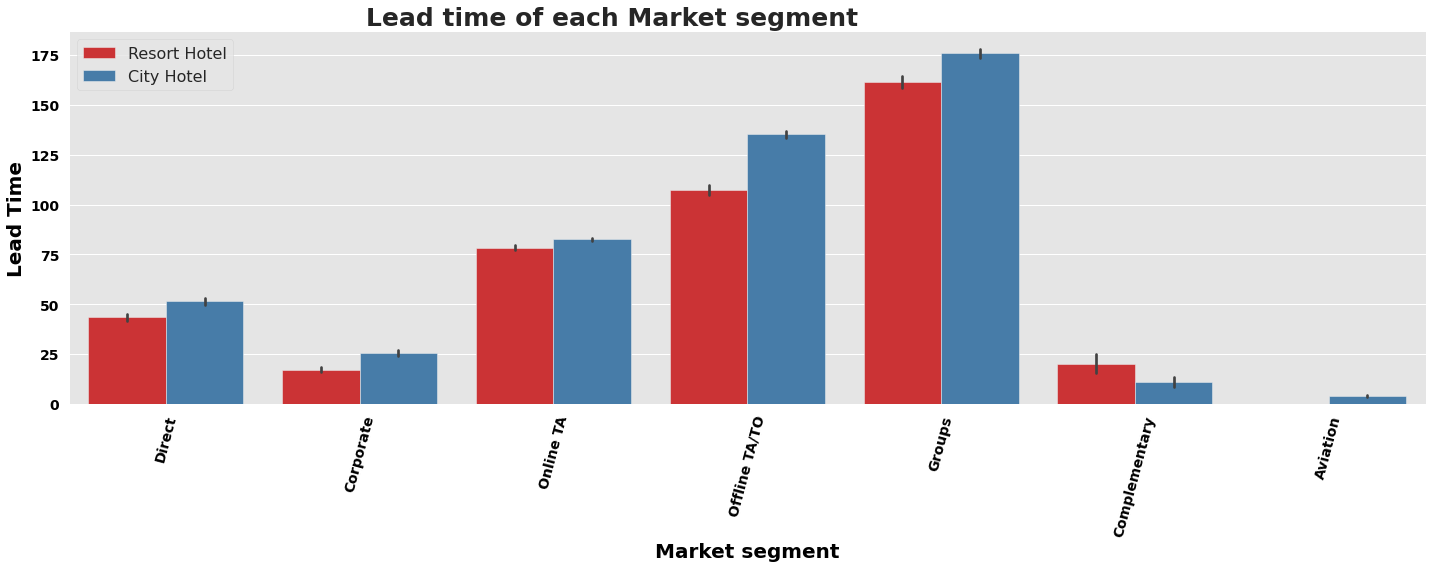

In [65]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
sns.barplot(x = "market_segment", y = "lead_time", data = hotel_df, hue = "hotel", palette = 'Set1');
plt.title('Lead time of each Market segment',fontsize= 25, fontweight='bold', x= 0.4);
plt.xlabel('Market segment',fontsize=20, fontweight = 'bold', color = 'black')
plt.ylabel('Lead Time',fontsize=20,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 14, fontweight = 'bold', color = 'black' , rotation = 75)
plt.yticks(fontsize = 14, fontweight = 'bold', color = 'black')
plt.legend(fontsize = 16)

plt.tight_layout();



### **Insights**
* It can be see from the graph that Groups have the highest lead time, while aviation has the least lead time.
* It is also notable that aviation sector has least booking in Resort hotel. 


## **Number of days at hotel per market segment**

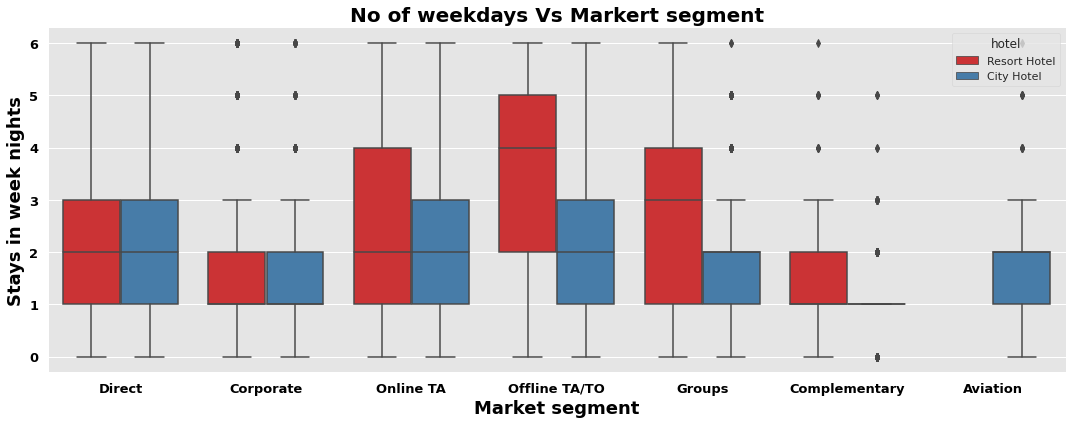

In [66]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_df, hue = "hotel", palette = 'Set1');
plt.title('No of weekdays Vs Markert segment',fontsize=20,fontweight="bold", color = 'black')
plt.ylabel('Stays in week nights',fontsize=18, fontweight = 'bold',color = 'black' )
plt.xlabel('Market segment',fontsize=18, fontweight = 'bold', color = 'black');
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')

plt.tight_layout();

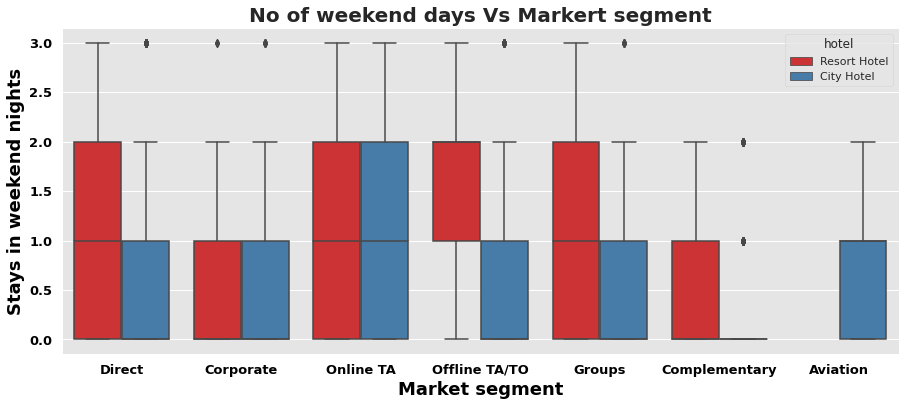

In [67]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hotel_df, hue = "hotel", palette = 'Set1');
plt.title('No of weekend days Vs Markert segment',fontsize=20,fontweight="bold");
plt.ylabel('Stays in weekend nights',fontsize=18, fontweight = 'bold', color = 'black')
plt.xlabel('Market segment',fontsize=18, fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black');


### **Insights**

Most people do not seem to prefer to stay at the hotel for more than 1 week.
Customers in the Aviation Segment are likely to arrive shortly due to business.
Customers from Aviation Segment do not seem to be staying at the resort hotels.

##**Relation between reserved and assigned room type**

### **Insights**

Below crosstable shows if there is any difference between assigned and reserved room types. The results are shown as a percentage. Average 87% of bookings keep their reserved room and the rest of the' rooms have been changed. Every row represents the reserved type and distribution over the columns shows what was the assigned room despite of reserved type.

In [68]:
(hotel_df['reserved_room_type']==hotel_df['assigned_room_type']).value_counts().values[0]/len(hotel_df) *100

87.22505118378918

In [69]:
pd.crosstab(index=hotel_df['reserved_room_type'],columns=hotel_df['assigned_room_type'],normalize='index',margins=True).round(2)*100

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,85.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,10.0,88.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,7.0,2.0,0.0,1.0,0.0,0.0,0.0
F,0.0,1.0,0.0,0.0,1.0,94.0,4.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,1.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0,0.0
L,20.0,20.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,20.0,0.0


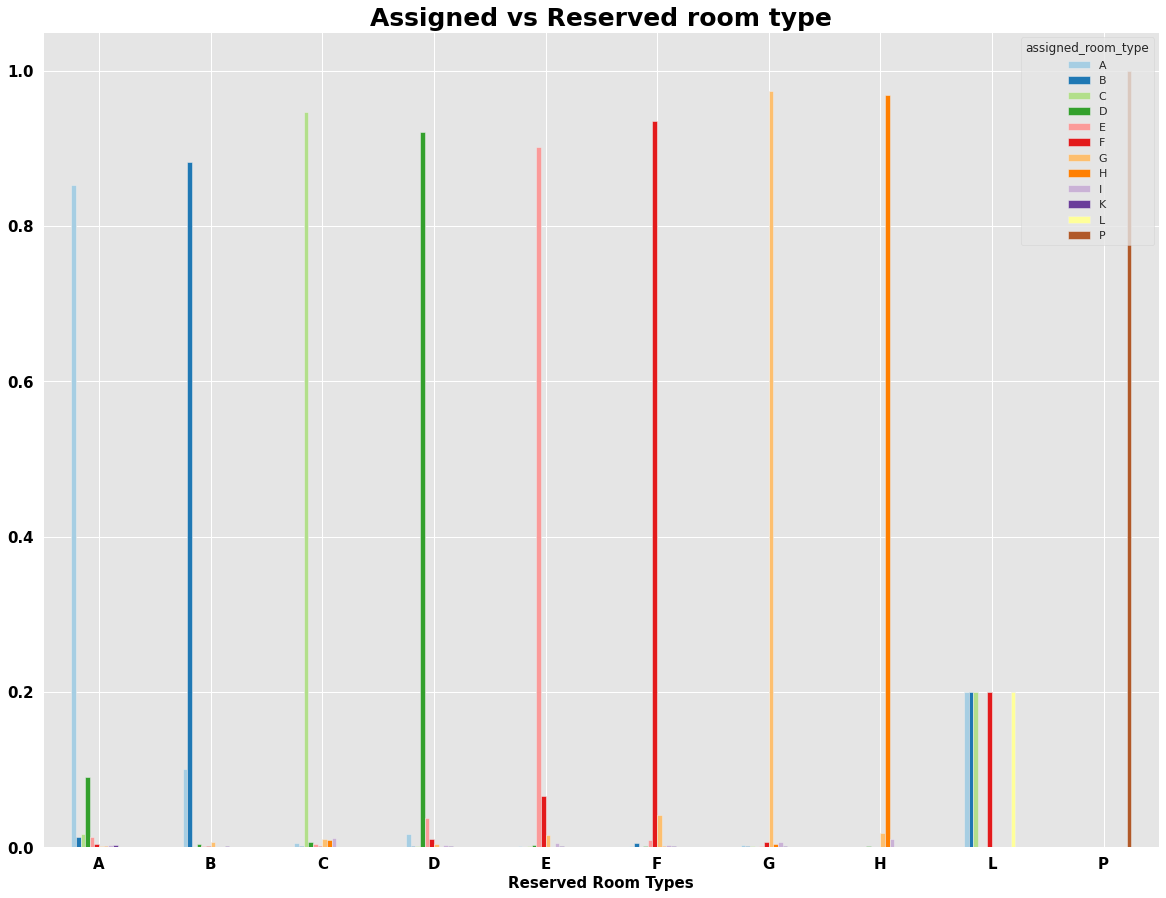

In [70]:
pd.crosstab(index=hotel_df['reserved_room_type'],columns=hotel_df['assigned_room_type'],normalize='index').plot(figsize=(20,15),kind="bar",stacked=False,colormap='Paired')
plt.title('Assigned vs Reserved room type',fontsize=25,fontweight='bold', color = 'black');
plt.xlabel('Reserved Room Types', fontweight = 'bold', size = 15, color = 'black')
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'black', rotation = 360)
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'black');

##**Co-relationship between Reserved room type and assigned room type**

In [71]:
df = hotel_df.loc[:,['assigned_room_type','reserved_room_type']]
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,assigned_room_type,reserved_room_type
assigned_room_type,1.000000,0.712267
reserved_room_type,0.712267,1.000000


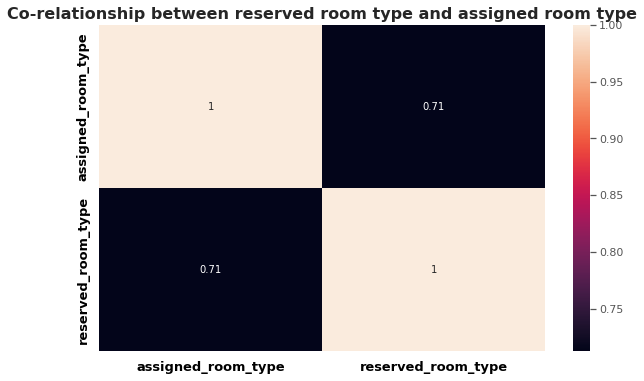

In [72]:
sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1),annot= True);
plt.title('Co-relationship between reserved room type and assigned room type',fontsize=16,fontweight ='bold')
plt.xticks(fontsize = 13, fontweight = 'bold',color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black');

# **Number of City Hotels and Resort Hotels**

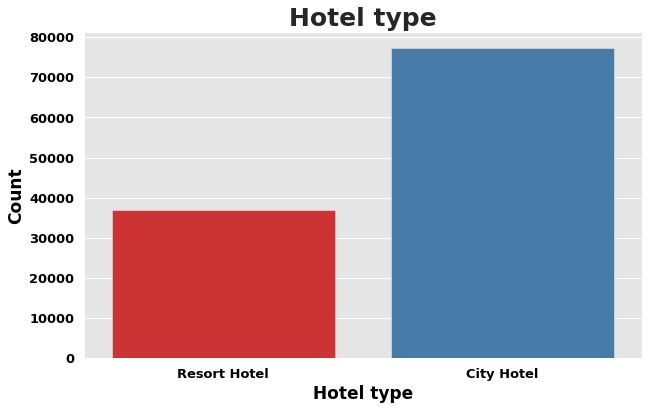

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(hotel_df['hotel'],palette="Set1")
plt.title('Hotel type',fontsize=25,fontweight='bold')
plt.xlabel('Hotel type',fontsize=17, fontweight = 'bold', color = 'black')
plt.ylabel('Count',fontsize=17, color = 'black', fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black');




### **Insights**

There are more City hotels than Resort hotels the reason could be there is more demand for city hotels.

##**Cancellations by repeated Guests**

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

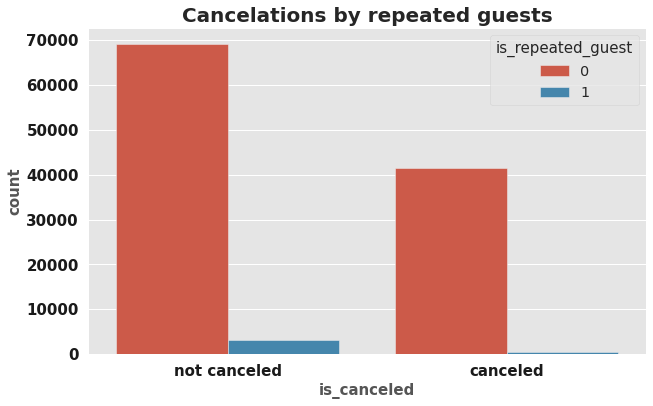

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=hotel_df,x='is_canceled',hue='is_repeated_guest',ax=ax)
plt.title('Cancelations by repeated guests',fontsize=20,fontweight='bold');
plt.legend(fontsize='x-large', title_fontsize='15',title='is_repeated_guest')
ax.set_xticklabels(['not canceled','canceled'])
plt.xlabel('is_canceled',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=15,fontweight='bold')
plt.xticks(color='k',fontweight='bold',fontsize=15)
plt.yticks(color='k',fontweight='bold',fontsize=15)

### **Insights**

Repeated guests cancel less relative to non-repeated guests

# **Cancellations according to Special Requests**

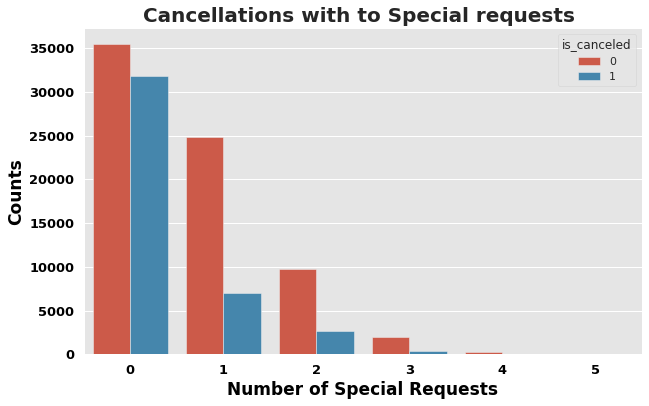

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(data=hotel_df,x='total_of_special_requests',hue='is_canceled')
plt.title('Cancellations with to Special requests ',fontsize=20,fontweight='bold')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.xlabel('Number of Special Requests',fontsize=17, fontweight = 'bold', color = 'black')
plt.ylabel('Counts',fontsize=17, fontweight = 'bold', color = 'black');

### **Insights**
Guests who have more than 1 special request are less prone to cancel their booking

# **How likely is the customer about to cancel based on previous booking cancellations**

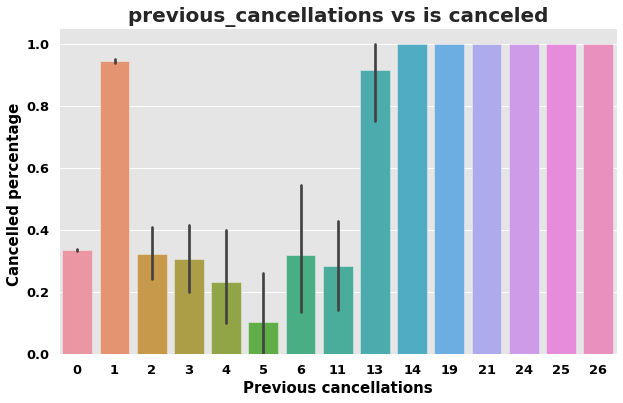

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x='previous_cancellations',data=hotel_df,y='is_canceled')
plt.title('previous_cancellations vs is canceled',fontsize=20,fontweight='bold')
plt.xlabel('Previous cancellations',fontsize=15, color = 'black', fontweight = 'bold')
plt.ylabel('Cancelled percentage ',fontsize=15, color = 'black', fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black');


### **Insights**
It can be seen that guests with more than 11 previous cancellations have a very high probability to cancel their booking.

##**Meal prefernces of different customer groups**

In [77]:
df = hotel_df[['meal','customer_type']]
df = df.groupby('meal')['customer_type'].value_counts().unstack()
df.drop(index=['Undefined'],inplace = True)

In [78]:
group_df = df.Group

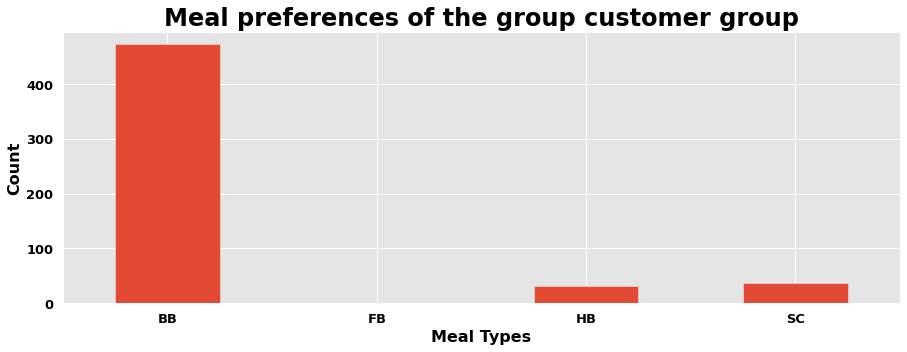

In [79]:
plt.figure(figsize=(15,5))
group_df.plot(kind='bar')
plt.xlabel('Meal Types',fontsize =16, fontweight = 'bold', color = 'black')
plt.ylabel('Count', fontsize =16, fontweight = 'bold', color = 'black')
plt.title("Meal preferences of the group customer group",size = 24,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 360)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.show();

In [80]:
contract_df  =  df.Contract

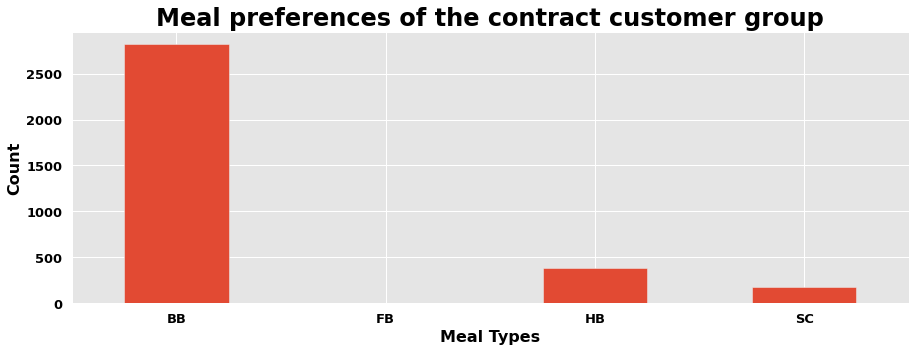

In [81]:

plt.figure(figsize=(15,5))
contract_df.plot(kind='bar') 
plt.xlabel('Meal Types',fontsize =16, fontweight = 'bold', color = 'black')
plt.ylabel('Count',fontsize = 16, fontweight = 'bold', color = 'black')
plt.title("Meal preferences of the contract customer group",size = 24,fontweight = 'bold', color = 'black' )
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 360)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.show()

In [82]:
transient_df = df.Transient

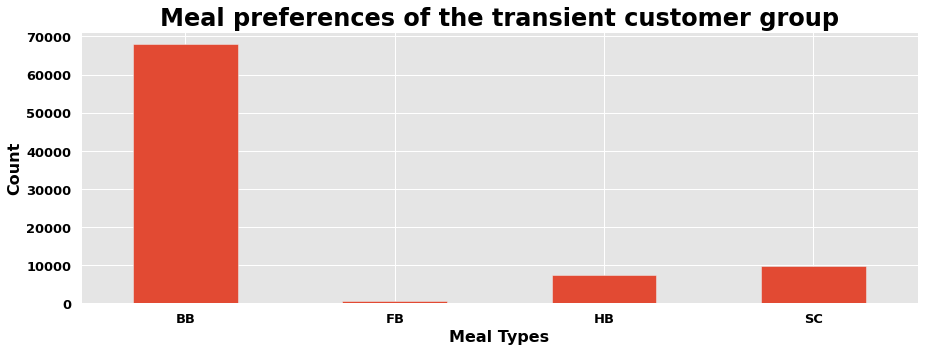

In [83]:
plt.figure(figsize=(15,5))
transient_df.plot(kind='bar')
plt.xlabel('Meal Types',fontsize =16, fontweight = 'bold', color = 'black')
plt.ylabel('Count',fontsize = 16, fontweight = 'bold', color = 'black')
plt.title("Meal preferences of the transient customer group",size = 24,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 360)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.show();

In [84]:
tp_df = df['Transient-Party']

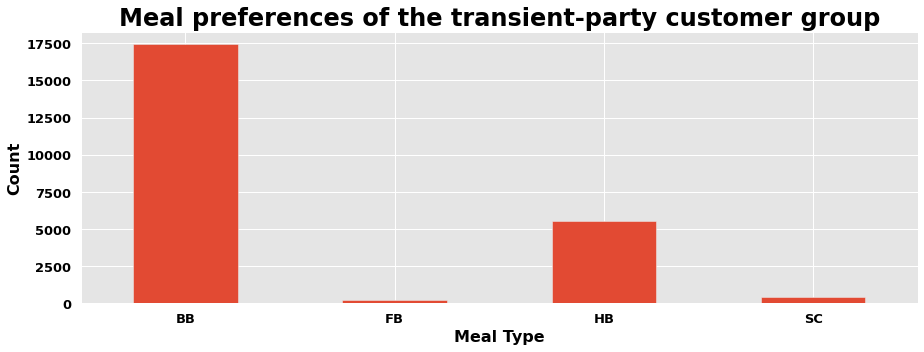

In [85]:
plt.figure(figsize=(15,5))
tp_df.plot(kind='bar')
plt.xlabel('Meal Type',fontsize = 16,fontweight = 'bold', color = 'black')
plt.ylabel('Count',fontsize = 16, fontweight = 'bold', color = 'black')
plt.title("Meal preferences of the transient-party customer group",size = 24,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 360)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.show();

###**Insights**
*   Among all the customers BB is the most popular meal option.
*   No customer group prefers FB, it the least popular meal option.








## **Months preferred by different customer groups.**

---



### **Months preferred by the group customer group.**

In [86]:
new_df = hotel_df[['arrival_date_month','customer_type']]
customer_type_df = new_df.groupby('arrival_date_month')['customer_type'].value_counts().unstack()
group_df =  customer_type_df['Group'].reset_index()
group_df= group_df.set_index('arrival_date_month')

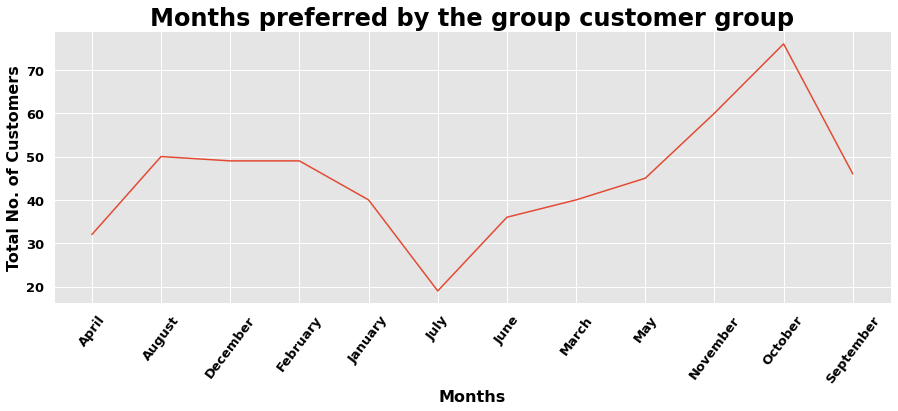

In [87]:
plt.figure(figsize=(15,5))
plt.plot(group_df)
plt.title('Months preferred by the group customer group', fontsize = 24, fontweight= 'bold',color = 'black')
plt.xlabel('Months',fontsize = 16,fontweight = 'bold', color = 'black')
plt.ylabel('Total No. of Customers',fontsize = 16,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 53)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.show()


## **Insights**
October Month is most prefered by the group customer type and July least prefered by the Group customer type.

In [88]:
transient_df =  customer_type_df['Transient'].reset_index()
transient_df= transient_df.set_index('arrival_date_month')


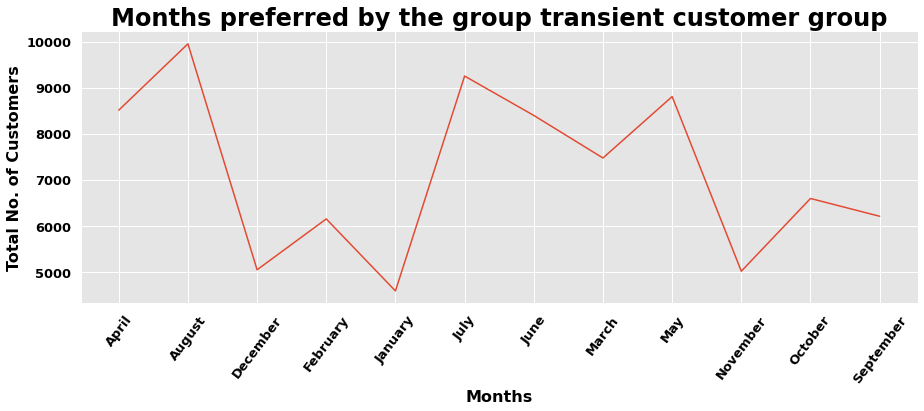

In [89]:
plt.figure(figsize=(15,5))
plt.plot(transient_df)
plt.xlabel('Months',fontsize = 16,fontweight = 'bold', color = 'black')
plt.ylabel('Total No. of Customers',fontsize = 16,fontweight = 'bold', color = 'black')
plt.title('Months preferred by the group transient customer group', fontsize = 24, fontweight= 'bold',color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 53)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.show();

## **Insights**
Auguast months are most prefered by Transient Customer type and January least prefered by Transient

### **Months with the highest cancellations**

In [90]:
cancle_df = hotel_df[['arrival_date_month','is_canceled','previous_cancellations']]
cancle_df.set_index('arrival_date_month',inplace=True)
cancle_df = cancle_df.groupby('arrival_date_month')['is_canceled'].value_counts().unstack().rename(columns={0:'not_cancled',1:'actually_cancled'})
actually_cancled = cancle_df['actually_cancled']

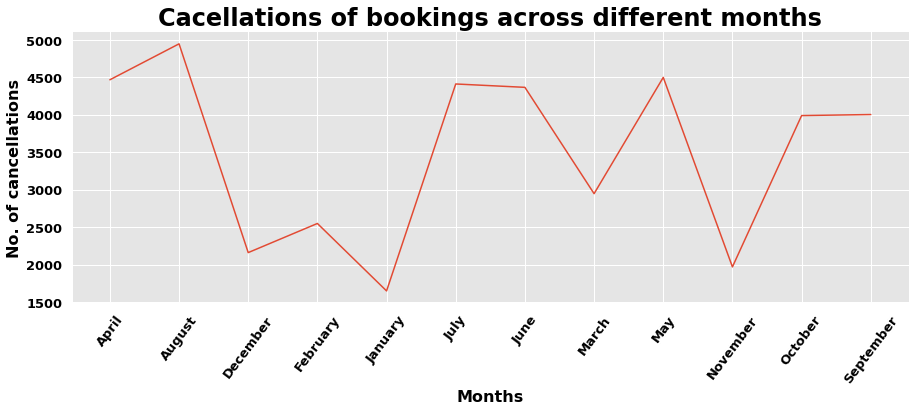

In [91]:
plt.figure(figsize=(15,5))
plt.plot(actually_cancled)
plt.xlabel('Months',fontsize = 16,fontweight = 'bold', color = 'black')
plt.ylabel('No. of cancellations',fontsize = 16,fontweight = 'bold', color = 'black')
plt.title("Cacellations of bookings across different months",fontsize = 24,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 53)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.show();

###**Insights**


*   In summer months(April-september) hotels have high cancellation rates.
*   During the winter months(October-January) cancellations rates for the hotels are low



##**Customer type with the most cancellations**

In [92]:
df = hotel_df[['customer_type','is_canceled']]
df = df.groupby('customer_type')['is_canceled'].value_counts().unstack().rename(columns={0:'not_cancled',1:'actually_cancled'})
cancle_df = df['actually_cancled']


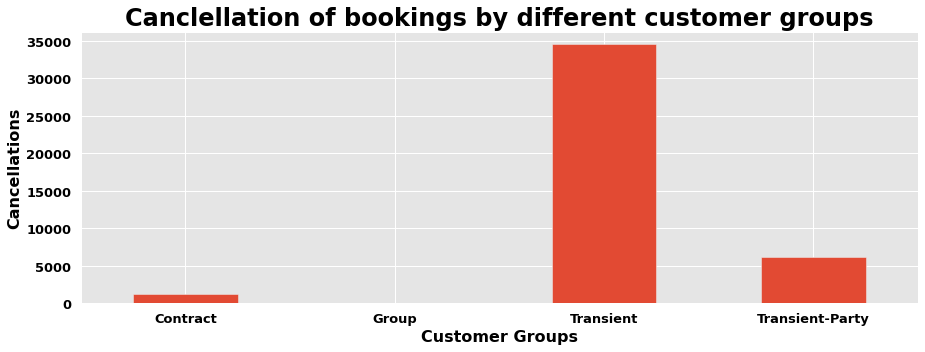

In [93]:
plt.figure(figsize=(15,5))
cancle_df.plot(kind='bar')
plt.xlabel('Customer Groups',fontsize = 16,fontweight = 'bold', color = 'black')
plt.ylabel('Cancellations',fontsize = 16,fontweight = 'bold', color = 'black')
plt.title("Canclellation of bookings by different customer groups",size = 24,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black', rotation = 360)
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.show()

###**Insights**

*   Most number of canclellations are done by the transient customer group.




##**Share of different market segments**

In [94]:
market_segment_df = hotel_df.market_segment.value_counts(normalize=True)
market_segment_df

Online TA        0.479666
Offline TA/TO    0.196861
Groups           0.163569
Direct           0.106104
Corporate        0.045505
Complementary    0.006431
Aviation         0.001864
Name: market_segment, dtype: float64

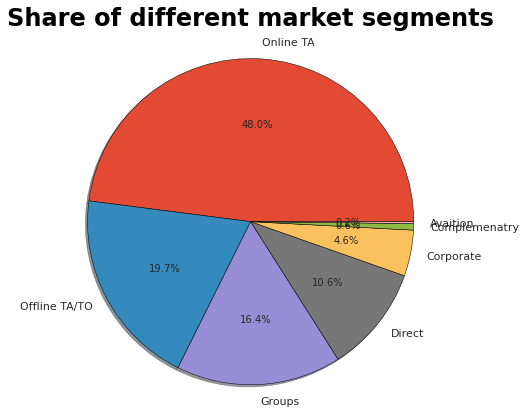

In [95]:
plt.figure(figsize=(15,5))
Labels = ['Online TA', 'Offline TA/TO', 'Groups', 'Direct','Corporate','Complemenatry','Avaition']

plt.pie(market_segment_df, wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        radius = 1.5, labels= Labels, shadow = 'True')

plt.title('Share of different market segments' ,size = 24, fontweight = 'bold', color = 'black', y = 1.20)

plt.show()


##**Insights**


*   Online TA is most popular, followed by offline TA/TO, groups and direct.
*   Corporate, complementary and avaition have lowest market share.




##**Cancellations rates of market segments**

In [96]:
df = hotel_df[['market_segment','is_canceled']]
df.set_index('market_segment',inplace=True)
df = df.groupby('market_segment')['is_canceled'].value_counts().unstack().rename(columns={0:'not_cancled',1:'actually_cancled'})

market_ac = df.actually_cancled
market_ac


market_segment
Aviation            48
Complementary       97
Corporate          965
Direct            1795
Groups           11212
Offline TA/TO     7976
Online TA        19857
Name: actually_cancled, dtype: int64

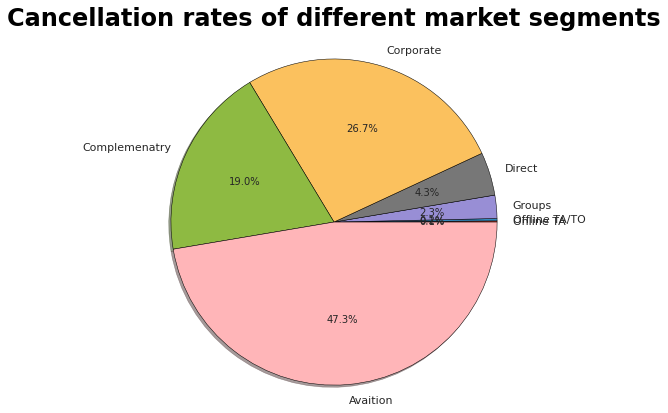

In [97]:
plt.figure(figsize=(15,5))

Labels = ['Online TA', 'Offline TA/TO', 'Groups', 'Direct','Corporate','Complemenatry','Avaition']

plt.pie(market_ac, wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        radius = 1.5, labels= Labels, shadow = 'True')

plt.title('Cancellation rates of different market segments' ,size = 24, fontweight = 'bold', color = 'black', y = 1.20)

plt.show()

##**What type of deposit is most preferred by the people?**

In [98]:
deposit_type_df = hotel_df.deposit_type.value_counts(normalize=True)
deposit_type_df

No Deposit    0.878795
Non Refund    0.119840
Refundable    0.001365
Name: deposit_type, dtype: float64

##**Insights**


*   No deposite is the most popular option.





##out of all deposite 87.5% people prefer No deposite and only 1.3% people prefer Refundable deposite type

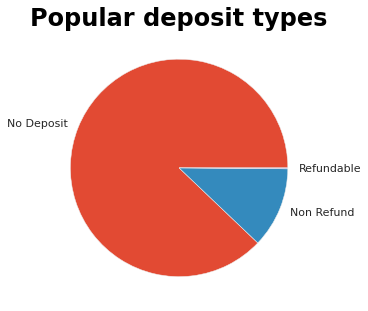

In [99]:
plt.figure(figsize=(15,5))
deposit_type_df.plot(kind='pie')
plt.title('Popular deposit types',size = 24, fontweight = 'bold', color = 'black')
plt.ylabel("",)
plt.show()

##**Insights**


*  Out of all deposite more than 85% people prefer No deposite and only less than 2% people prefer Refundable deposite type




##**Which is more popular resort or city hotels?**

In [100]:
#Check unique value in hotel varible;
hotel_df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

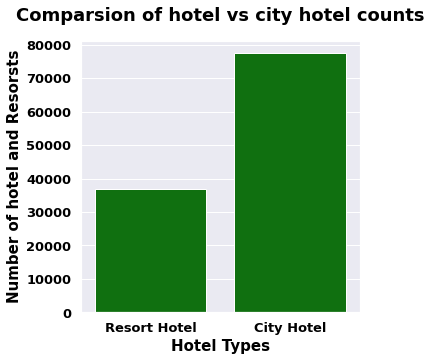

In [101]:
#Show value counts for a single categorical variable for hotel;
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="hotel",data=hotel_df,color="green")
plt.xlabel("Hotel Types",fontsize=15, fontweight = 'bold', color = 'black')
plt.ylabel("Number of hotel and Resorsts", size = 15,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')

plt.title("Comparsion of hotel vs city hotel counts", fontsize = 18, fontweight = 'bold', color = 'black', y = 1.05);



##**Cancellation rates of both the hotel types**

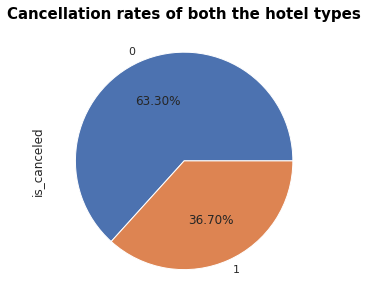

In [102]:
hotel_df["is_canceled"].value_counts().plot(kind="pie",autopct="%1.2f%%",figsize=(10,5))
plt.title("Cancellation rates of both the hotel types",fontsize=15,fontweight = 'bold', color = 'black')
plt.show()

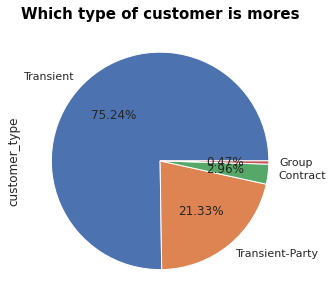

In [103]:
hotel_df["customer_type"].value_counts().plot(kind="pie",autopct="%1.2f%%",figsize=(10,5))
plt.title("Which type of customer is mores",fontsize=15, fontweight = 'bold', color = 'black')
plt.show()

##**Months with highest and lowest booking rates**

(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 9 Text major ticklabel objects>)

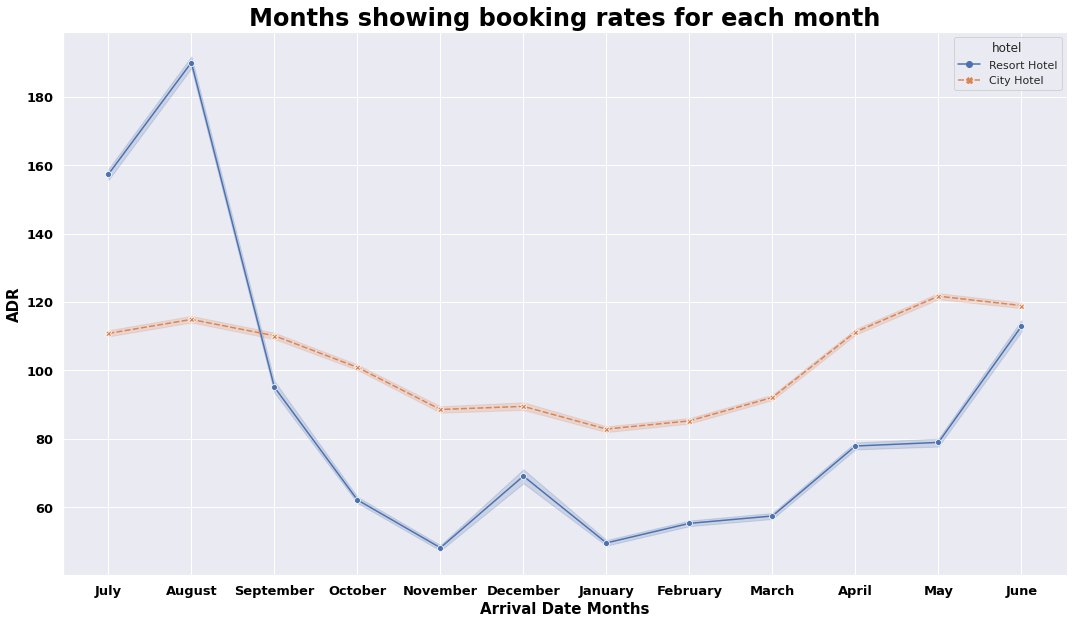

In [104]:
#This is a lineplot of the adr for different hotel types
plt.figure(figsize=(18,10))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= hotel_df,style="hotel", markers=True )
plt.title("Months showing booking rates for each month", size = 24, fontweight = 'bold', color = 'black')
plt.xlabel("Arrival Date Months",fontsize=15, fontweight = 'bold', color = 'black')
plt.ylabel("ADR", size = 15,fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'black')


##**Insights**

Both city and resort hotels,from November to january have lowest and August have highest average daily rates.

##**Waiting times for different market segments**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x720 with 0 Axes>

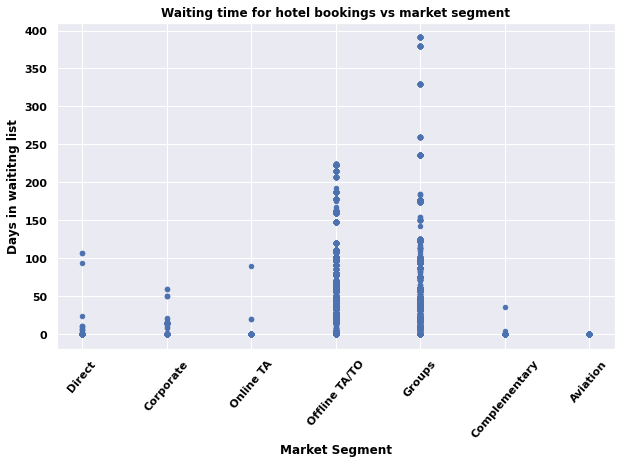

In [105]:
#This is a scatter plot for Market segment and days_in_waiting_list 

plt.figure(figsize = (15,10))
hotel_df.plot.scatter(x='market_segment', y = 'days_in_waiting_list')
plt.title('Waiting time for hotel bookings vs market segment',color = 'black', fontweight = 'bold')
plt.xticks(color = 'black', fontweight = 'bold', rotation = 50)
plt.yticks(color = 'black', fontweight = 'bold')
plt.ylabel('Days in waititng list', color = 'black', fontweight = 'bold')
plt.xlabel('Market Segment', color = 'black', fontweight = 'bold')
plt.show()


###**Insights**

From the graph we can conclude that through the 'Groups' market segment customers get to wait for more time

##**Popular market segments**




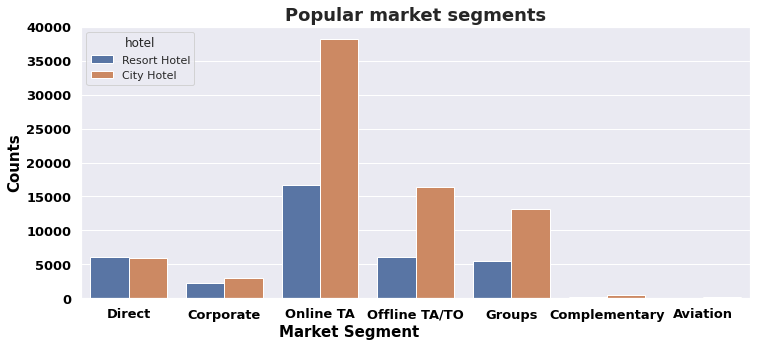

In [106]:
#How do people do book the most
plt.figure(figsize=(12,5))
ax = sns.countplot(x="market_segment", hue="hotel", data=hotel_df)
plt.title('Popular market segments' ,fontsize=18, fontweight = 'bold')
plt.xlabel("Market Segment",fontsize=15, color = 'black', fontweight = 'bold', x = 0.4, y = 0.2)
plt.ylabel("Counts", fontsize=15, color = 'black', fontweight = 'bold')
plt.xticks(fontsize = 13, color = 'black', fontweight = 'bold')
plt.yticks(fontsize = 13, color = 'black', fontweight = 'bold');


##**Market segment over the years**

<Figure size 1440x1080 with 0 Axes>

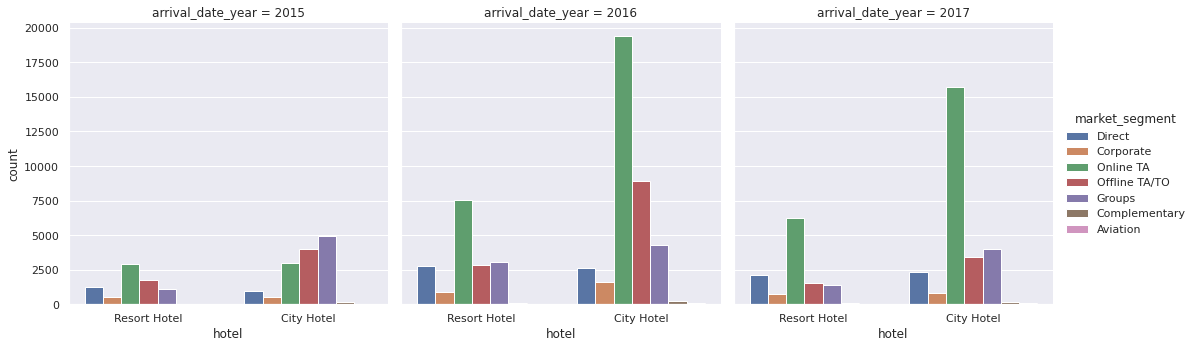

In [107]:
plt.figure(figsize = (20,15))
g = sns.catplot(x="hotel", hue="market_segment", col="arrival_date_year",
                data=hotel_df, kind="count");
              



##**Popular room types**

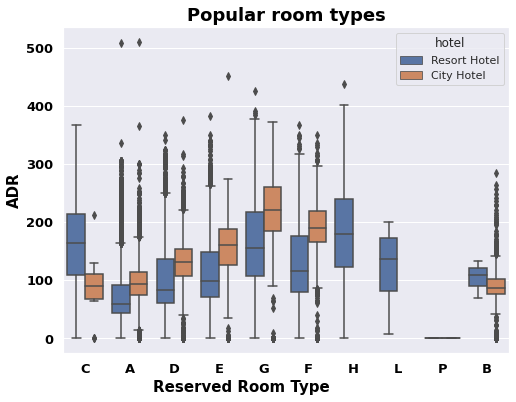

In [108]:
new_df=hotel_df[hotel_df["is_canceled"]==0]
fig=plt.figure(figsize=(8,6))
sns.boxplot(data=hotel_df,x="reserved_room_type",y="adr",hue="hotel")
plt.title("Popular room types",fontsize=18, color = 'black', fontweight = 'bold')
plt.xlabel("Reserved Room Type",fontsize=15, color = 'black', fontweight = 'bold', x = 0.4, y = 0.2)
plt.ylabel("ADR", fontsize=15, color = 'black', fontweight = 'bold')
plt.xticks(fontsize = 13, color = 'black', fontweight = 'bold')
plt.yticks(fontsize = 13, color = 'black', fontweight = 'bold');



##**Booking made by the hotels each month**

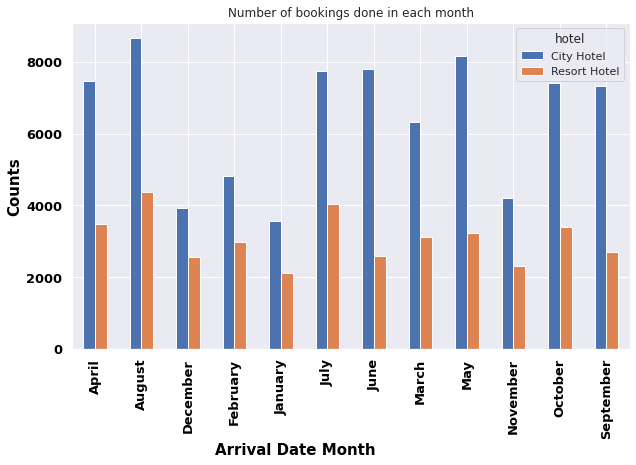

In [109]:
# This is a barplot to find the number of bookings in each month
bar = hotel_df.groupby(['arrival_date_month', 'hotel']).size().unstack()
bar.plot.bar(title = 'Number of bookings done in each month' , xlabel = 'arrival date month' , ylabel = 'count of booking' , figsize = (10,6))
plt.xlabel("Arrival Date Month",fontsize=15, color = 'black', fontweight = 'bold', x = 0.4, y = 0.2)
plt.ylabel("Counts", fontsize=15, color = 'black', fontweight = 'bold')
plt.xticks(fontsize = 13, color = 'black', fontweight = 'bold')
plt.yticks(fontsize = 13, color = 'black', fontweight = 'bold');


##**Insights**

From the above bar plot we can see that number of bookings made by city and resort hotels during each month. Every month city hotel get more booking than resort hotel and it is maximum during August.



##**Countries with the highest customers**

In [110]:
country_count = hotel_df['country'].value_counts().to_frame()
country_count.columns = ['Count']
fig_country = px.choropleth(country_count, color='Count',
                    locations=country_count.index,
                    hover_name=country_count.index,
                    color_continuous_scale=px.colors.sequential.YlGn)
fig_country.update_traces(marker=dict(line=dict(color='#7201a8', width=1)))
fig_country.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22),)
fig_country.show()

## **Top 5 countries to focus on**

In [111]:
 mask = hotel_df['country'].value_counts().index
 clrs = ['black' if (x in mask[:5]) else 'orange' for x in mask]

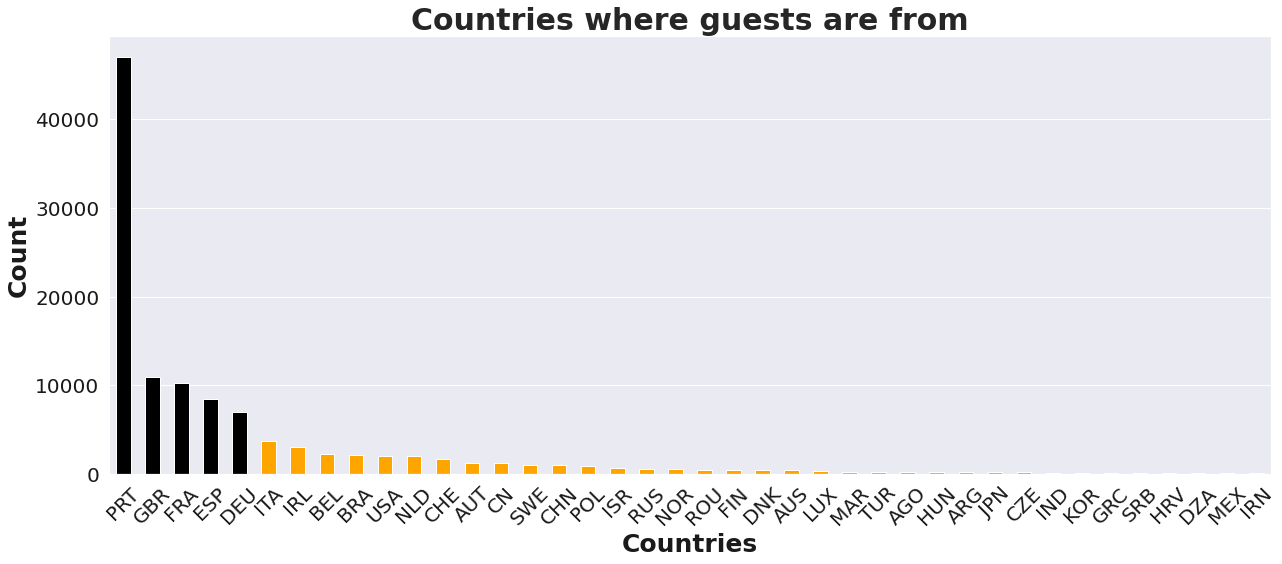

In [112]:
# top 10 countries to focus on
hotel_df['country'].value_counts()[:40].plot(kind='bar',figsize = (18,8),color=clrs);
plt.grid(axis = 'x')
plt.title('Countries where guests are from',fontsize=30,fontweight="bold")
plt.xlabel('Countries',fontsize=25,fontweight="bold",color='k')
plt.ylabel('Count',fontsize=25,fontweight="bold",color='k')
plt.xticks(color='k',fontsize=20,rotation=45)
plt.yticks(color='k',fontsize=20)
plt.tight_layout()


## **Insights**
Most guests come from Portugal(PTR), Great Britain(GBR), France(FRA), Spain(ESP), Germany(DEU), Italy(ITA), Ireland(IRL), Belgium(BEL), Brazil(BRA) and Netherlands(NLD).

## **Most booked room type**

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

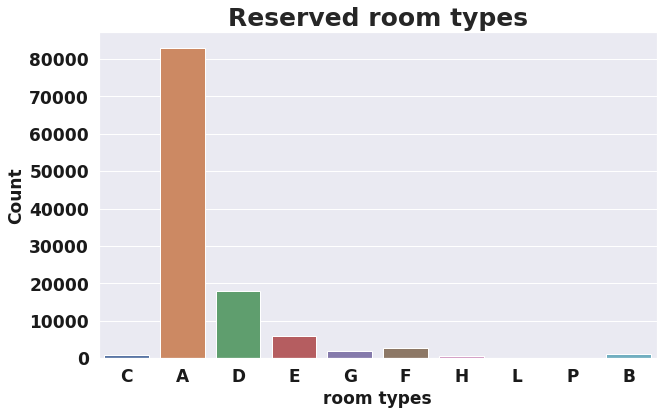

In [113]:
sns.countplot(data=hotel_df,x='reserved_room_type')
plt.title('Reserved room types',size = 25,fontweight='bold')
plt.ylabel('Count', size = 17,fontweight='bold',color='k');
plt.xlabel('room types', size = 17,fontweight='bold',color='k');

plt.xticks(fontsize=17,fontweight='bold',color='k')
plt.yticks(fontsize=17,fontweight='bold',color='k')


## **Insights**
Room type A is the most popular room followed by D and E.

## **Special requests of each market type**

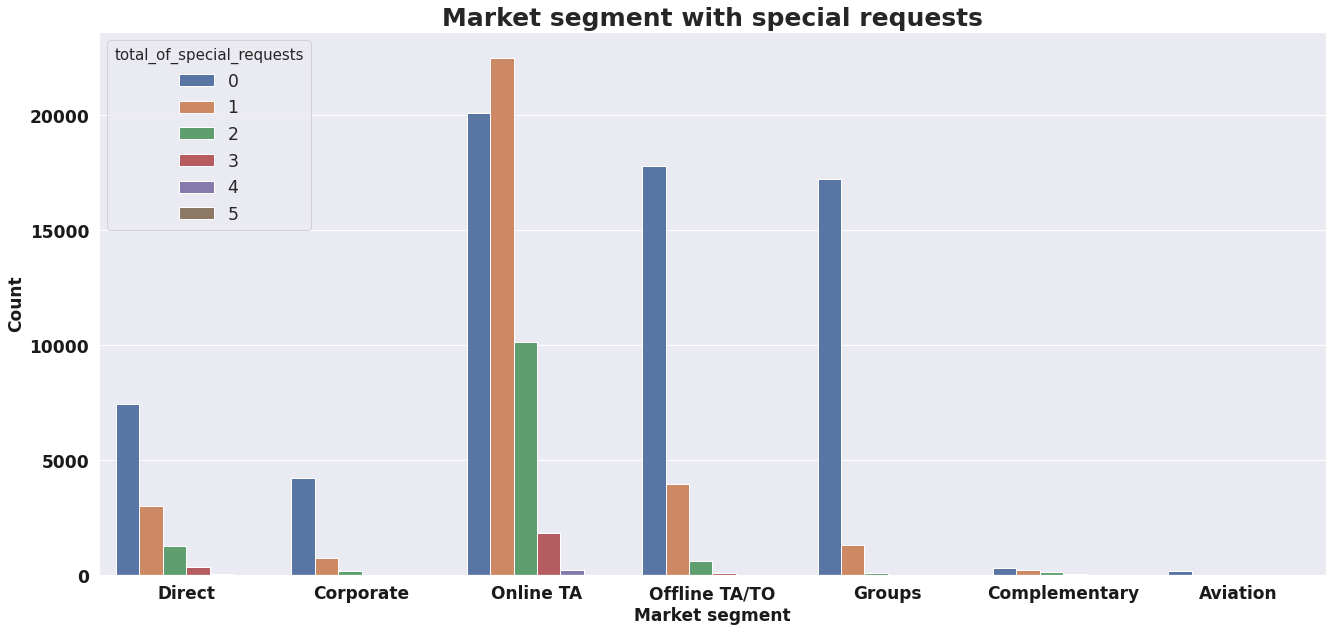

In [114]:
# Special requests of each market type
plt.figure(figsize=(22,10))
sns.countplot(data=hotel_df,x='market_segment',hue='total_of_special_requests')
plt.title('Market segment with special requests',size = 25,fontweight='bold')
plt.ylabel('Count', size = 17,fontweight='bold',color='k');
plt.xlabel('Market segment', size = 17,fontweight='bold',color='k');
plt.legend(fontsize='x-large', title_fontsize='15',title='total_of_special_requests')
plt.xticks(fontsize=17,fontweight='bold',color='k')
plt.yticks(fontsize=17,fontweight='bold',color='k');

### **Insights**
Online TA type of market segment has disproportionatly high special requests.

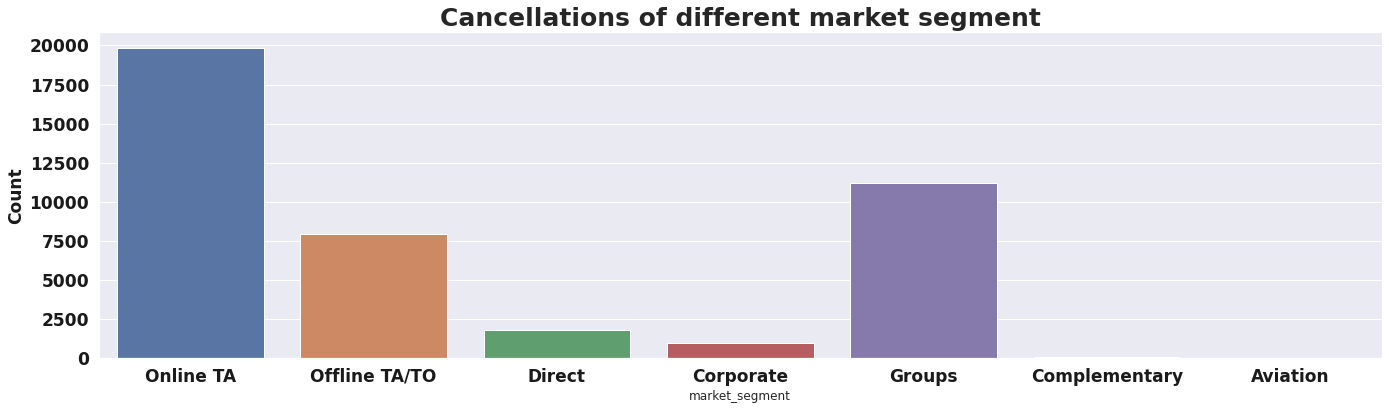

In [115]:
plt.figure(figsize=(23 ,6))
sns.countplot(x=hotel_df[hotel_df['is_canceled']==1]['market_segment'])
plt.title('Cancellations of different market segment',size = 25,fontweight='bold')
plt.ylabel('Count', size = 17,fontweight='bold',color='k');

plt.xticks(fontsize=17,fontweight='bold',color='k')
plt.yticks(fontsize=17,fontweight='bold',color='k');

## **Insights**
Online TA has highest cancellations followed by Groups and offline TA/To.

## **Market segment preferred by repeated and non repeated guests.**

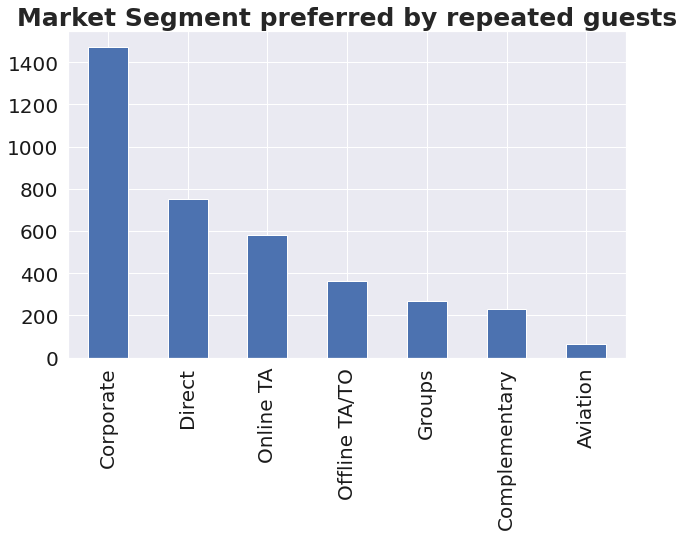

In [116]:
# Market Segment preferred by repeated guests
hotel_df[hotel_df['is_repeated_guest']==1]['market_segment'].value_counts().plot(kind='bar')
plt.title('Market Segment preferred by repeated guests',fontweight='bold',fontsize=25)
plt.xticks(color='k',size=20)
plt.yticks(color='k',size=20);

## **Insights**
Repeated guests prefer Corpotate market segment the most.

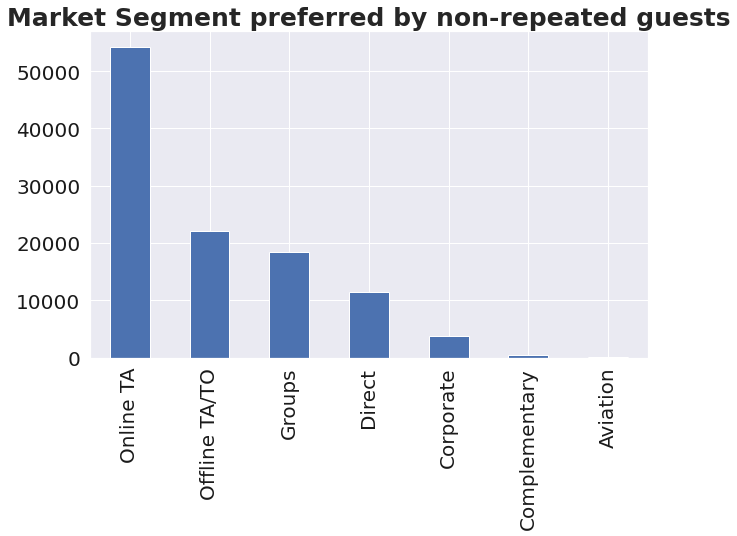

In [117]:
# Market Segment preferred by non-repeated guests
hotel_df[hotel_df['is_repeated_guest']==0]['market_segment'].value_counts().plot(kind='bar')
plt.title('Market Segment preferred by non-repeated guests',fontweight='bold',fontsize=25)
plt.xticks(color='k',size=20)
plt.yticks(color='k',size=20);

## **Insights**
Non-repeated guests prefer online TA market segment the most.

## **Heatmap of numeric variables**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text major ticklabel objects>)

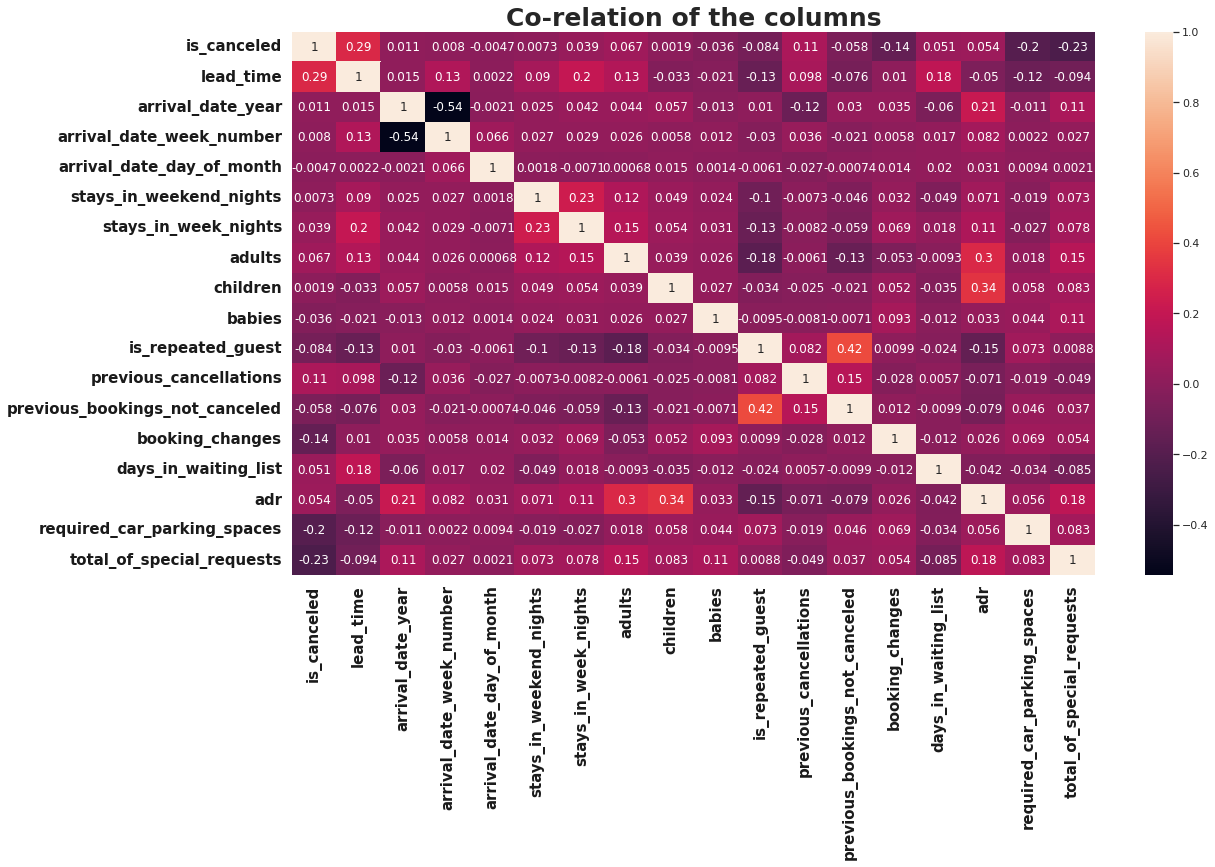

In [118]:
fig,axes = plt.subplots(1,1,figsize=(18,10))
sns.heatmap(hotel_df.corr(),annot=True)
plt.title('Co-relation of the columns',fontweight='bold',fontsize=25)
plt.xticks(fontweight='bold',color='k',size=15)
plt.yticks(fontweight='bold',color='k',size=15)

## **Insights**
Hightest Positive correlation of 0.42 can be observed between the columns 'is_repeated_guest' and 'previous_bookings_not_canceled'.


